In [1]:
#Install the kaggle Library
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#For kaggle Api Upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pradeep01223","key":"e2616b349248928314a0d40a602d3e92"}'}

In [3]:
#Creating Working directory for the Dataset from Kaggle
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [4]:
#This is the Dataset used to train the model 
!kaggle datasets download -d karnikakapoor/art-portraits
#This code will download the dataset from kaggle using kaggle api
#Then need to unzip the dataset
!unzip art-portraits.zip

100% 1.30G/1.30G [00:13<00:00, 120MB/s]
100% 1.30G/1.30G [00:13<00:00, 107MB/s]
Archive:  art-portraits.zip
  inflating: Portraits/000c6828b825f032af6047b46eba2686c.jpg  
  inflating: Portraits/0010cbc73014ac5e7ac81fd44eff1f3dc.jpg  
  inflating: Portraits/004b5f7cc82dadaa51dbb3b2230b5f85c.jpg  
  inflating: Portraits/004d60b7e881eb08966f711ce80523ecc.jpg  
  inflating: Portraits/007c5bf3a436793544a83c4a73c5cb4fc.jpg  
  inflating: Portraits/007f332f33bd1a8541912ca2b1701252c.jpg  
  inflating: Portraits/009c616c4a6415c96f795aa920dc2e85c.jpg  
  inflating: Portraits/00afb8e719aa2ea716a5b6a54c5c55fbc.jpg  
  inflating: Portraits/00bd05a5d525f451228196e47d51e243c.jpg  
  inflating: Portraits/00c775299a9b11d6a4d310a1464d7493c.jpg  
  inflating: Portraits/00ca56f16c0bae52185ea31f95f0484cc.jpg  
  inflating: Portraits/00d643034afe01ab875b817dc5de3af5c.jpg  
  inflating: Portraits/00dc0126ea387c24bf4a401686134308c.jpg  
  inflating: Portraits/00e24bd88ccabec5dcecfbe97a9d14a7c.jpg  
  inflatin

In [5]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk("/content/Portraits"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
np.random.seed(42)

/content/Portraits/b5c6a955efc160c8f7131bd1289c9086c.jpg
/content/Portraits/37d5f1f52ec969999f90ec0a07ad0a38c.jpg
/content/Portraits/04cd26b21f44250cb0e22a2c267fed3fc.jpg
/content/Portraits/ec638c22bb6173d1ac9e457a197dc75ec.jpg
/content/Portraits/c8e93e33bdf18361e5c63a40150f0963c.jpg
/content/Portraits/769affd65397193bd30328e28444882dc.jpg
/content/Portraits/eec27ac6585be8c427f4552c4a475043c.jpg
/content/Portraits/ef1ded1802cc802d921bed46dcfb9b46c.jpg
/content/Portraits/ad3410a829796a1b1263c29ef9b158fdc.jpg
/content/Portraits/000c6828b825f032af6047b46eba2686c.jpg
/content/Portraits/c416fe362a49286a712361b402d7159cc.jpg
/content/Portraits/19cf2523509207192ad5428e613680efc.jpg
/content/Portraits/a2701b2a7d2ca3fa55dbca033b865259c.jpg
/content/Portraits/00d643034afe01ab875b817dc5de3af5c.jpg
/content/Portraits/f3ff84fde60be5639aa4f153a37aa47bc.jpg
/content/Portraits/8b11122e90893cbef4a4d78acc6253d3c.jpg
/content/Portraits/e8479c5aa0a42d765c7ac9e933217945c.jpg
/content/Portraits/8fcc3a61b08b

In [6]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
from PIL import Image
import tensorflow  as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, UpSampling2D, Conv2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU, Dropout, ZeroPadding2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam
import tqdm
import warnings
warnings.filterwarnings("ignore")

sns.set(rc={"axes.facecolor":"#EDE9DE","figure.facecolor":"#D8CA7E"})

In [7]:

data_path = "/content/Portraits"
batch_s = 64

data = tf.keras.preprocessing.image_dataset_from_directory(data_path, label_mode = None, image_size = (64,64), batch_size = batch_s)

Found 4117 files belonging to 1 classes.


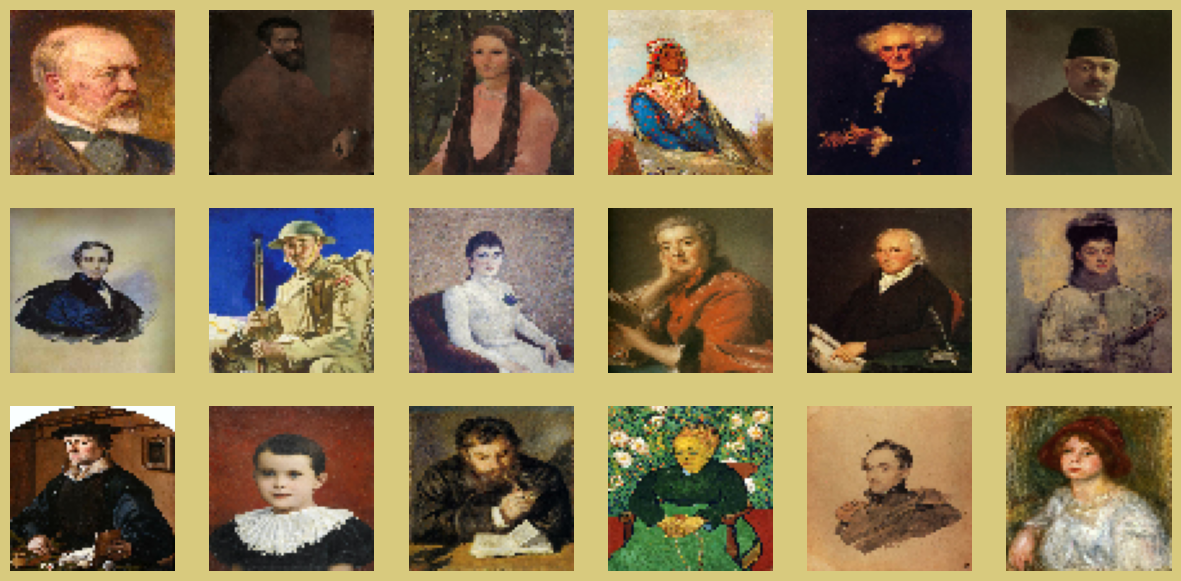

In [8]:
def Show_Img(data):
    plt.figure(figsize=(15,15))
    for images in data.take(1):
        for i in range(18):
            ax = plt.subplot(6, 6, i + 1)
            ax.imshow(images[i].numpy().astype("uint8"))
            ax.axis("off")
       
Show_Img(data)

In [9]:
data = data.map(lambda x: x / 255.0)
data

<_MapDataset element_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None)>

In [10]:
latent_dim = 100
g_resolution=2
#Create the Architecture for Generator Model
generator = Sequential()
generator.add(Dense(4*4*256,activation="relu",input_dim=latent_dim))
generator.add(Reshape((4,4,256)))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(256,kernel_size=3,padding="same"))#
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(UpSampling2D())
generator.add(Conv2D(128,kernel_size=3,padding="same"))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Activation("relu"))
generator.add(Conv2D(3,kernel_size=3,padding="same"))
generator.add(Activation("tanh"))

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4096)              413696    
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 256)        0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 8, 8, 256)         590080    
                                                                 
 batch_normalization (BatchN  (None, 8, 8, 256)        1024      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 8, 8, 256)         0

(-0.5, 63.5, 63.5, -0.5)

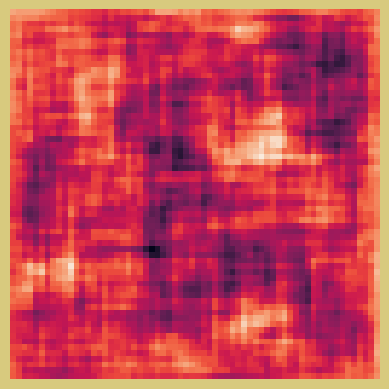

In [11]:
seed = tf.random.normal([1, latent_dim])
Generated_Portrait = generator(seed, training=False)

plt.imshow(Generated_Portrait[0, :, :, 0])
plt.axis("off")

In [12]:
#Creating the Discriminator Architecture
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size=3, strides=2, input_shape=(64,64,3), padding="same"))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
discriminator.add(ZeroPadding2D(padding=((0,1),(0,1))))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Conv2D(512, kernel_size=3, strides=1, padding="same"))
discriminator.add(BatchNormalization(momentum=0.8))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.25))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 zero_padding2d (ZeroPadding  (None, 17, 17, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 17, 17, 64)       256       
 hNormalization)                                      

In [13]:
Discriminator_Verdict = discriminator(Generated_Portrait)
print (Discriminator_Verdict)

tf.Tensor([[0.5003099]], shape=(1, 1), dtype=float32)


In [14]:
#Creating the GAN model by combining the Generator and Discriminator
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = tf.keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = tf.keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        
        batch_size = tf.shape(real_images)[0]
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))
        
        generated_images = self.generator(seed)
        
        combined_images = tf.concat([generated_images, real_images], axis=0)
        
        labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0)
        
        labels += 0.05 * tf.random.uniform(tf.shape(labels))
        
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_weights))

        
        seed = tf.random.normal(shape=(batch_size, self.latent_dim))

        
        misleading_labels = tf.zeros((batch_size, 1))

        
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(seed))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

**Fittng the Train dataset in GAN Model**

In [15]:
#Fitting the training dataset to the GAN model 
epochs = 200

discriminator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)
generator_opt = tf.keras.optimizers.Adamax(1.5e-4,0.5)

loss_fn = tf.keras.losses.BinaryCrossentropy()


model = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)


model.compile(d_optimizer=discriminator_opt, g_optimizer=generator_opt, loss_fn=loss_fn)


history = model.fit(data, epochs=epochs)

Epoch 1/200
65/65 [==============================] - 57s 568ms/step - d_loss: 0.6709 - g_loss: 0.7430
Epoch 2/200
65/65 [==============================] - 39s 523ms/step - d_loss: 0.6732 - g_loss: 0.8171
Epoch 3/200
65/65 [==============================] - 39s 543ms/step - d_loss: 0.6377 - g_loss: 0.8945
Epoch 4/200
65/65 [==============================] - 39s 546ms/step - d_loss: 0.6364 - g_loss: 0.8541
Epoch 5/200
65/65 [==============================] - 40s 536ms/step - d_loss: 0.6402 - g_loss: 0.8655
Epoch 6/200
65/65 [==============================] - 40s 532ms/step - d_loss: 0.6161 - g_loss: 0.8836
Epoch 7/200
65/65 [==============================] - 39s 546ms/step - d_loss: 0.6115 - g_loss: 0.9342
Epoch 8/200
65/65 [==============================] - 40s 550ms/step - d_loss: 0.5789 - g_loss: 1.0183
Epoch 9/200
65/65 [==============================] - 39s 527ms/step - d_loss: 0.6005 - g_loss: 1.0920
Epoch 10/200
65/65 [==============================] - 39s 529ms/step - d_loss: 0.6

**Plotting the Learning Curve**

Text(0.5, 1.0, 'Learning Curve')

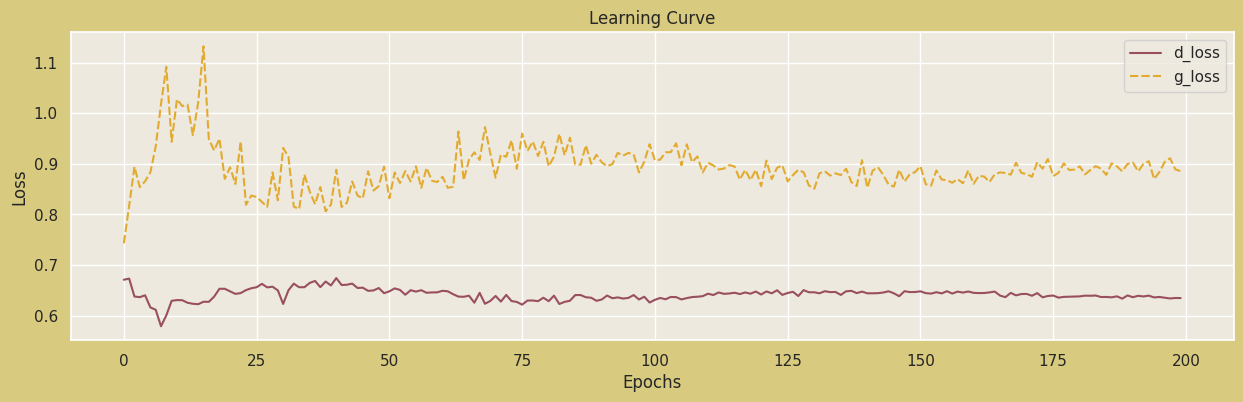

In [16]:
pal=["#994F5F","#E2AB30"]

history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4)) 
ax=sns.lineplot(data=history_df, palette= pal)
ax.set(xlabel ="Epochs")
ax.set(ylabel ="Loss")
ax.set_title("Learning Curve")

In [17]:

num_img=27


def Potrait_Generator():
    Generated_Paintings = []
    seed = tf.random.normal([num_img, latent_dim])
    generated_image = generator(seed)
    generated_image *= 255 
    generated_image = generated_image.numpy()
    for i in range(num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_image[i])
            Generated_Paintings.append(img)
            img.save("Potraits{:02d}.png".format(i)) 
    return 


Images = Potrait_Generator()

**Generating sample images using the GAN Model**


Found 4144 files belonging to 1 classes.


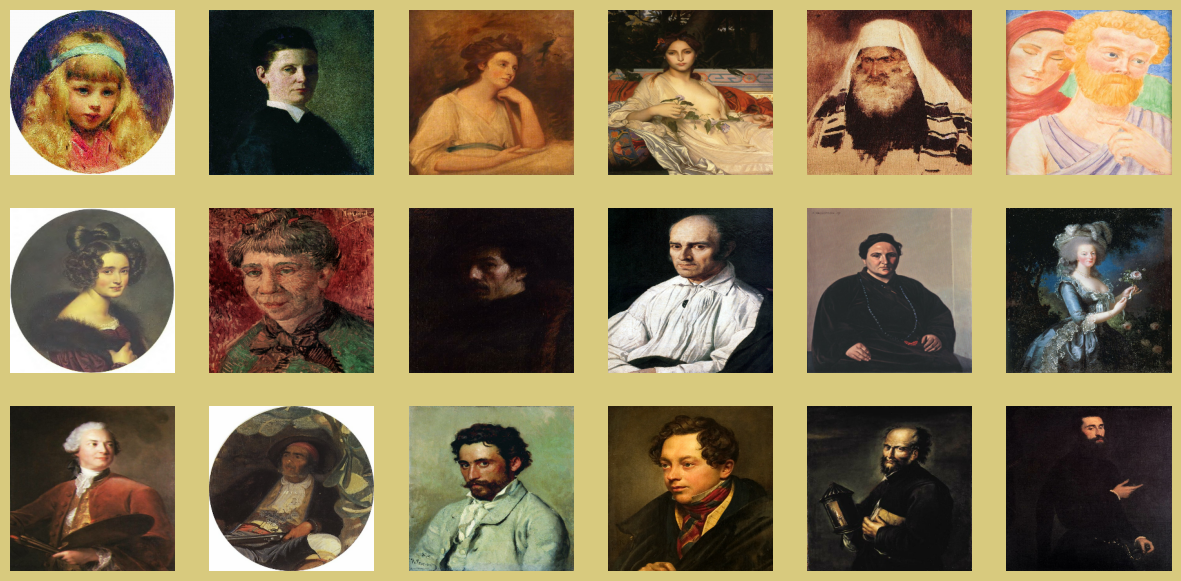

In [18]:
Generated_path = "./"
Potraits_generated = tf.keras.preprocessing.image_dataset_from_directory(Generated_path, label_mode = None)
#Plotting generated images
Show_Img(Potraits_generated)

In [23]:
Images2 = Potrait_Generator()

Found 4144 files belonging to 1 classes.


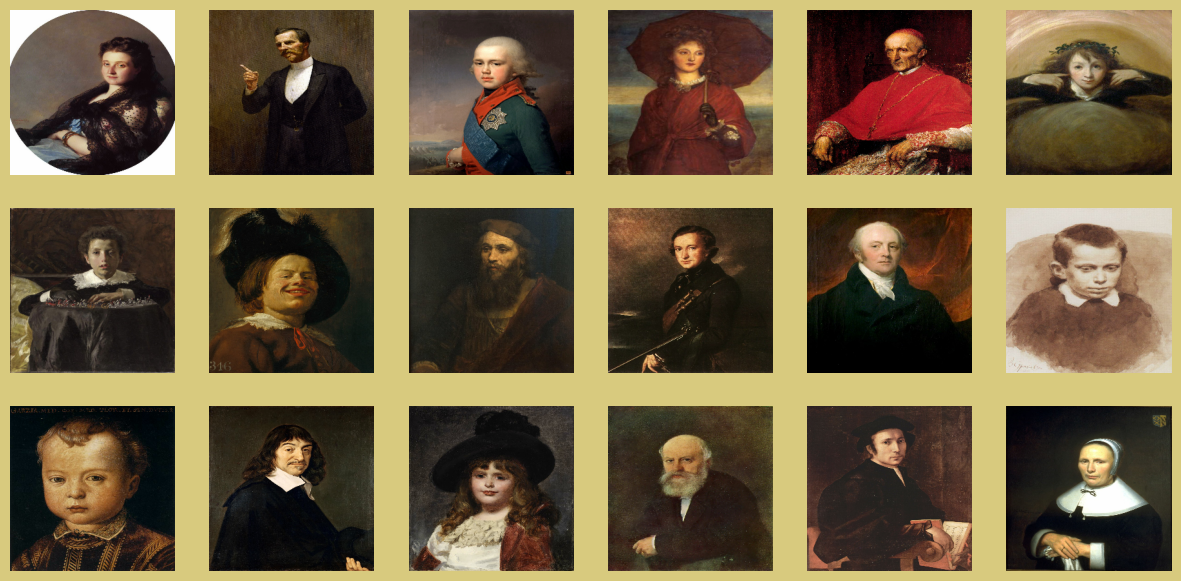

In [24]:
Generated_path = "./"
Potraits_generated = tf.keras.preprocessing.image_dataset_from_directory(Generated_path, label_mode = None)
#Plotting generated images
Show_Img(Potraits_generated)